Exercise meanshift
Exercise 1 understand the titanic data example
Understand the Titanic clustering example

Look at this Notebook
Go through the code and make sure you understand everything
Exercise 2 use meanshift on the iris dataset
load 'iris_data.csv' into a dataframe
get unique labels (Species column)
plot with a scatter plot each iris flower sample colored by label (3 different colors)
use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result
print out labels, cluster centers and number of clusters (as returned from the MeanShift function
create a new scatter plot where each flower is colored according to cluster label
add a dot for the cluster centers
Compare the 2 plots (colored by actual labels vs. colored by cluster label)

Populating the interactive namespace from numpy and matplotlib
I. setosa b
I. versicolor g
I. virginica r


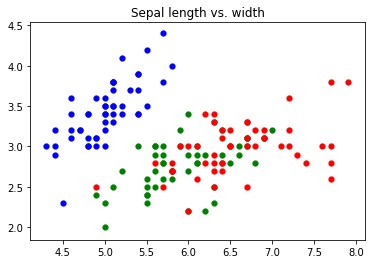

Number of estimated clusters : 3
Labels : [0 1 2]
Cluster centers : [[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]


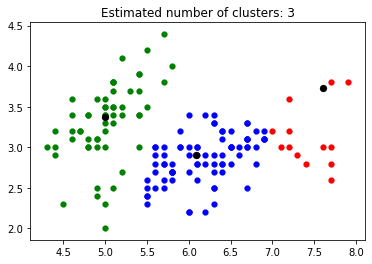

In [14]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
from itertools import cycle

from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    print('Labels : {}'.format(labels_unique))
    print('Cluster centers : {}'.format(cluster_centers))
    return labels, cluster_centers, n_clusters

filename = './iris_data.csv'
df = pd.read_csv(filename)
df

labels = np.unique(df['Species'])

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for label, col in zip(labels, colors):
    print(label, col)
    x = df[df['Species'] == label]['Sepal length']
    y = df[df['Species'] == label]['Sepal width']

    ax.scatter(x, y, c=col,  linewidth=0.2)
    
plt.title('Sepal length vs. width')
plt.show()

data_2d = df[['Sepal length', 'Sepal width']].values
labels, cluster_centers, n_clusters = mean_shift(data_2d)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col,  linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()

the red cluster is a lot more spread out. 